# Data Ballancing
Data balancing techniques are needed in the presence of unbalanced datasets - when the target variable doesn't have a uniform distribution, i.e. the classes are not equiprobable. In the case of binary classification, we usually call **positive to the minority class, and negative to the majority one**.

We can follow two different strategies: undersampling and oversampling. The choice of each one of them, depends on the size of the dataset, i.e., the number of records to use as train:
- With a huge dataset, and consequently a **considerable number of positve records**, we can use an **undersampling** strategy, keeping the positive records and sampling the negative ones to balance the final distribution 
- In the presence of a **small number of positive records**, we need to appy **oversampling**, in order to create a larger set to support the training step. Among the different oversampling techniques we find SMOTE, one of the most interesting ones.


One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or **SMOTE** for short.

## Heart Failure Dataset

### Imports and data loading

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC, SMOTE
import csv

data = pd.read_csv('../datasets/heart_failure_clinical_records_dataset.csv')

### Class Imbalance

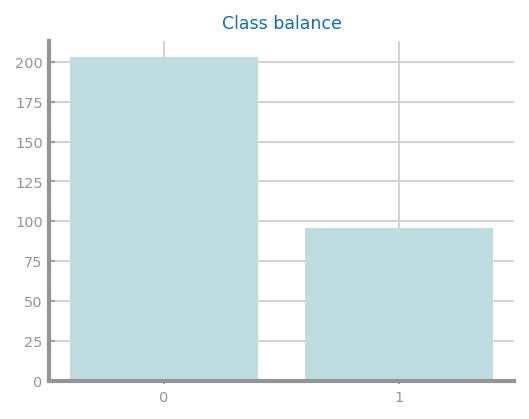

Minority class: 96
Majority class: 203
Proportion: 0.47 : 1.0


In [23]:
target_count = data['DEATH_EVENT'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()
min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

### Balancing

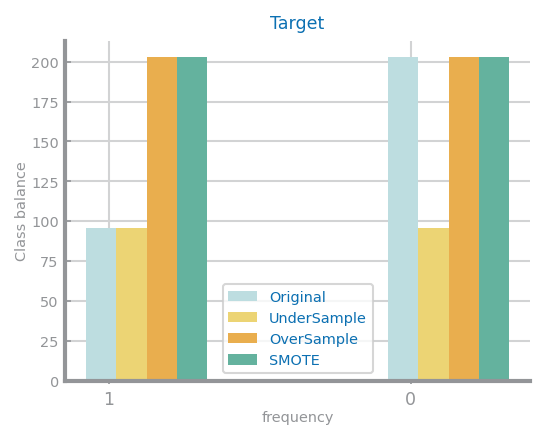

In [33]:
data = pd.read_csv('../datasets/heart_failure_clinical_records_dataset.csv')

RANDOM_STATE = 42
values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = data[data['DEATH_EVENT'] == min_class]
df_class_max = data[data['DEATH_EVENT'] != min_class]

#UNDERSAMPLING
df_under = df_class_max.sample(len(df_class_min))
values['UnderSample'] = [target_count.values[ind_min_class], len(df_under)]

#OVERSAMPLING
df_over = df_class_min.sample(len(df_class_max), replace=True)
values['OverSample'] = [len(df_over), target_count.values[1-ind_min_class]]

#SMOTE

# Get binary columns
bool_cols = [data.columns.get_loc(col) for col in data if 
               data[col].dropna().value_counts().index.isin([0,1]).all() and col != "DEATH_EVENT"]

#smote = SMOTE(sampling_strategy='minority', random_state=RANDOM_STATE)
smote = SMOTENC(categorical_features=bool_cols, sampling_strategy='minority', random_state=RANDOM_STATE)
y = data.pop('DEATH_EVENT').values
X = data.values

smote_X, smote_y = smote.fit_sample(X, y)
smote_target_count = pd.Series(smote_y).value_counts()
values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

fig = plt.figure()
ds.multiple_bar_chart([target_count.index[ind_min_class], target_count.index[1-ind_min_class]], values,
                      title='Target', xlabel='frequency', ylabel='Class balance')
plt.show()

### Storing Balanced Dataset (SMOTE)

In [34]:
data = pd.read_csv('../datasets/heart_failure_clinical_records_dataset.csv')
with open('../datasets/hf_balanced/HF_balanced.csv', 'w', newline='') as balanced_data:
    writer = csv.writer(balanced_data, delimiter=',')
    
    #Add header
    writer.writerow(data.columns)
    index = 0
    for i in range(0,len(smote_y)):
        new_row = []
        for j in range(0,len(smote_X[i])):
            new_row.append(smote_X[i][j])
        new_row.append(smote_y[i])
                    
        writer.writerow(new_row)

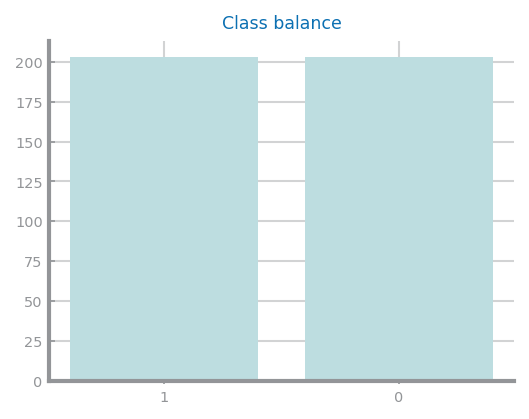

Minority class: 203
Majority class: 203
Proportion: 1.0 : 1.0


In [35]:
data = pd.read_csv('../datasets/hf_balanced/HF_balanced.csv')

target_count = data['DEATH_EVENT'].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

## QSAR Oral Toxicity Dataset

### Imports and data loading

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import ds_functions as ds
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
import csv

data: pd.DataFrame = pd.read_csv('../datasets/qsar_oral_toxicity.csv', sep=';', header=None)    

### Class Imbalance

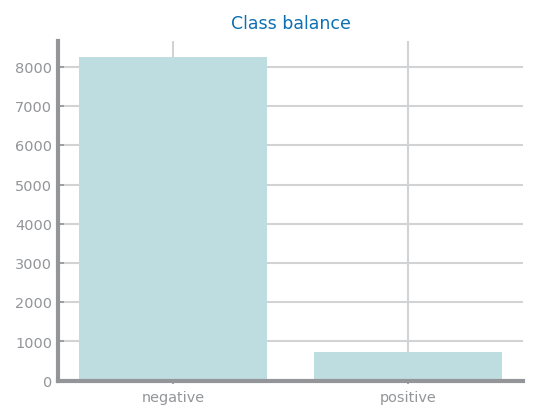

Minority class: 741
Majority class: 8251
Proportion: 0.09 : 1.0


In [7]:
target_count = data[1024].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

### Balancing

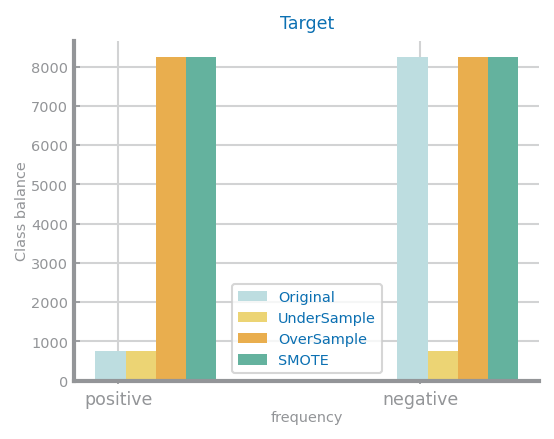

In [8]:
RANDOM_STATE = 42
values = {'Original': [target_count.values[ind_min_class], target_count.values[1-ind_min_class]]}

df_class_min = data[data[1024] == min_class]
df_class_max = data[data[1024] != min_class]

#UNDERSAMPLING
df_under = df_class_max.sample(len(df_class_min))
values['UnderSample'] = [target_count.values[ind_min_class], len(df_under)]

#OVERSAMPLING
df_over = df_class_min.sample(len(df_class_max), replace=True)
values['OverSample'] = [len(df_over), target_count.values[1-ind_min_class]]

#SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=RANDOM_STATE)
y = data.pop(1024).values
X = data.values
smote_X, smote_y = smote.fit_sample(X, y)
smote_target_count = pd.Series(smote_y).value_counts()
values['SMOTE'] = [smote_target_count.values[ind_min_class], smote_target_count.values[1-ind_min_class]]

fig = plt.figure()
ds.multiple_bar_chart([target_count.index[ind_min_class], target_count.index[1-ind_min_class]], values,
                      title='Target', xlabel='frequency', ylabel='Class balance')
plt.show()

### Storing Balanced Dataset (SMOTE)

In [9]:
with open('../datasets/oral_balanced/ORAL_balanced.csv', 'w', newline='') as balanced_data:
    writer = csv.writer(balanced_data, delimiter=';')

    index = 0
    for i in range(0,len(smote_y)):
        new_row = []
        for j in range(0,len(smote_X[i])):
            new_row.append(smote_X[i][j])
        new_row.append(smote_y[i])
                    
        writer.writerow(new_row)

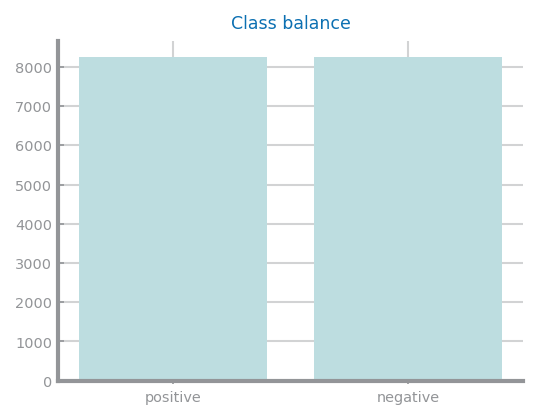

Minority class: 8251
Majority class: 8251
Proportion: 1.0 : 1.0


In [10]:
data: pd.DataFrame = pd.read_csv('../datasets/oral_balanced/ORAL_balanced.csv', sep=';', header=None)    
    
target_count = data[1024].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

### Storing Reduced 32-Bit Balanced Dataset

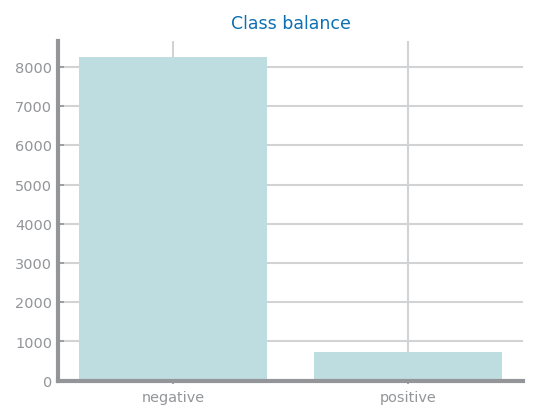

Minority class: 741
Majority class: 8251
Proportion: 0.09 : 1.0


In [11]:
data: pd.DataFrame = pd.read_csv('../datasets/oral_reduced/ORAL_reduced32.csv', sep=';', header=None)    
    
target_count = data[32].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

In [12]:
with open('../datasets/oral_balanced/ORAL_balanced.csv', newline='') as original_data:
    with open('../datasets/ORAL_balanced_reduced32.csv', 'w', newline='') as reduced_data:
        reader = csv.reader(original_data, delimiter=';')
        writer = csv.writer(reduced_data, delimiter=';')
        for row in reader:
            new_row = []

            i = 0
            new_var = ""
            for bit in row:
                new_var += bit
                if i == 31:
                    new_row.append(new_var)  
                    
                    new_var = ""
                    i = 0
                else:
                    i+=1
                    
            new_row.append(row[-1]) #Append the target variable
                    
            writer.writerow(new_row)

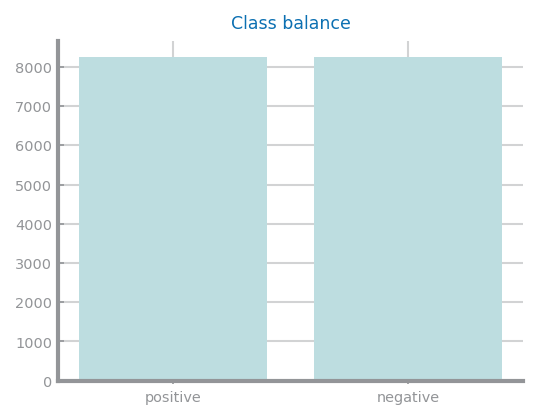

Minority class: 8251
Majority class: 8251
Proportion: 1.0 : 1.0


In [13]:
data: pd.DataFrame = pd.read_csv('../datasets/ORAL_balanced_reduced32.csv', sep=';', header=None)    
    
target_count = data[32].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

### Storing Reduced 64-Bit Balanced Dataset

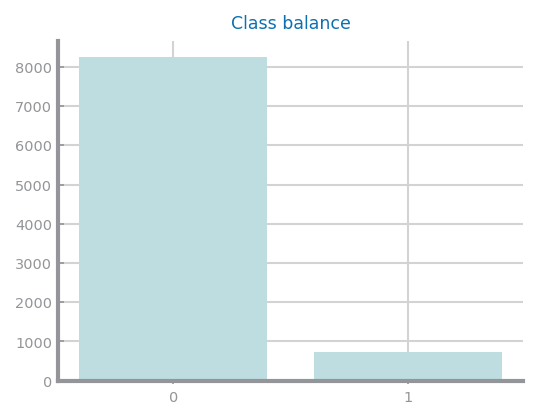

Minority class: 741
Majority class: 8251
Proportion: 0.09 : 1.0


In [14]:
data: pd.DataFrame = pd.read_csv('../datasets/oral_reduced/ORAL_reduced64.csv', sep=';', header=None)    
data.head()
target_count = data[16].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')

In [15]:
def bin_to_integer(bitlist):
    """Returns the integer conversion from a number represented in a binary string"""
    out = 0
    for bit in bitlist:
        out = (out << 1) | int(bit)

    return out

with open('../datasets/oral_balanced/ORAL_balanced.csv', newline='') as original_data:
    with open('../datasets/ORAL_balanced_reduced64.csv', 'w', newline='') as reduced_data:
        reader = csv.reader(original_data, delimiter=';')
        writer = csv.writer(reduced_data, delimiter=';')
        for row in reader:
            new_row = []

            i = 0
            new_var = ""
            for bit in row:
                new_var += bit
                if i == 63:
                    new_row.append(bin_to_integer(new_var))
                    
                    new_var = ""
                    i = 0
                else:
                    i+=1
                    
            new_row.append(1 if row[-1] == 'positive' else 0) #Append the target variable
                    
            writer.writerow(new_row)

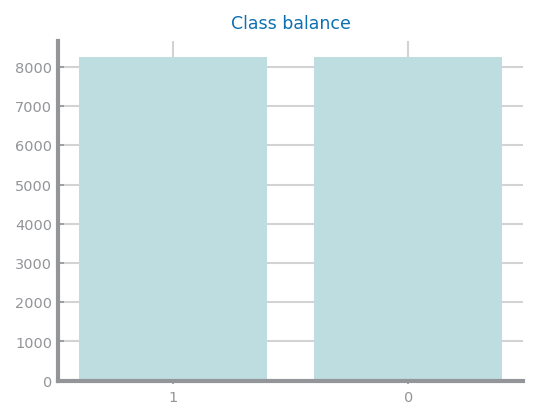

Minority class: 8251
Majority class: 8251
Proportion: 1.0 : 1.0


In [16]:
data: pd.DataFrame = pd.read_csv('../datasets/ORAL_balanced_reduced64.csv', sep=';', header=None)    
    
target_count = data[16].value_counts()
plt.figure()
plt.title('Class balance')
plt.bar([str(a) for a in target_count.index], target_count.values)
plt.show()

min_class = target_count.idxmin()
ind_min_class = target_count.index.get_loc(min_class)

print('Minority class:', target_count[ind_min_class])
print('Majority class:', target_count[1-ind_min_class])
print('Proportion:', round(target_count[ind_min_class] / target_count[1-ind_min_class], 2), ': 1.0')